In [3]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from bs4 import BeautifulSoup
from env import api_key
import time
import json
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.reset_option("display.max_rows", "display.max_columns")
import prepare
import re
from time import sleep

In [76]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

    
def plot_pairplot(train, cols, hue=None):
    '''
    Take in train df, list of columns to plot, and hue=None
    and display scatter plots and hists.
    '''
    sns.pairplot(train[cols], corner=True)
    plt.show()
    
    
    
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    train.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()
    
def explore_univariate(df, variable):
    '''
    explore_univariate will take in a dataframe, and one feature or variable. It graphs a box plot and a distribution 
    of the single variable.
    '''
    #set figure size, font for axis ticks, and turns off gridlines.
    plt.figure(figsize=(30,10))
    sns.set(font_scale = 2)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=variable, data=df)
    plt.xlabel('')
    plt.title('Box Plot', fontsize=30)
    
    # distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=variable, element='step', kde=True, color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Distribution', fontsize=30)
    
    #title
    plt.suptitle(f'{variable}', fontsize = 45)
    plt.tight_layout()
    plt.show()
    
    
def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue=target)
    plt.show()    

def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 6), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat) 

def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()


# Exploration

In [10]:
df = pd.read_csv('bryant-chris_games.csv')

- Target = Winning_Team

Questions to research
Univariate Study
- Ward score effects the outcome
- assists effects the outcome 
- damage by magic effects the outcome
- buildings effect the outcome
- xp gained effects the outcome
- number of inhibitors lost effects the outcome
- inhibitor lost team 100, team_jungleMinionsKilled_100, team_killsplayer_100, team_level_100, team_minionsKilled_100.
- repeat above but for 200 team
- dragaon team effects the outcome of the game

Bivariate Study

- winning team and blue team level > 50, also < 50
- same for red team
- team_magicDamageDoneToChampions_100 > the average, also < average
- run same for 200
- winning team and team_physicalDamageDoneToChampions_100 > average, also < average
- run same for 200

Multivariate Study

-  blue team takes dragons and red team inhibitors lost effects the outcome


In [13]:
df = pd.read_csv('bryant-chris_games.csv')

In [14]:
df

,Unnamed: 0,assistsplayer_1,assistsplayer_2,assistsplayer_3,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,assistsplayer_10,currentGold_1,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,currentGold_10,deathsplayer_1,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_8,deathsplayer_9,dragon_team200,gameMode,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,inhibs_lost_team100,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,riftherald_team200,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,assistsplayer_4,baron_team200,deathsplayer_10,deathsplayer_7,dragon_team100,inhibs_lost_team200,riftherald_team100,baron_team100,killsplayer_0,team_deathsplayer_100,team_deathsplayer_200,team_goldPerSecond_100,team_goldPerSecond_200,team_jungleMinionsKilled_100,team_jungleMinionsKilled_200,team_killsplayer_100,team_killsplayer_200,team_level_100,team_level_200,team_magicDamageDoneToChampions_100,team_magicDamageDoneToChampions_200,team_minionsKilled_100,team_minionsKilled_200,team_physicalDamageDoneToChampions_100,team_physicalDamageDoneToChampions_200,team_timeEnemySpentControlled_100,team_timeEnemySpentControlled_200,team_totalDamageDoneToChampions_100,team_totalDamageDoneToChampions_200,team_totalGold_100,team_totalGold_200,team_trueDamageDoneToChampions_100,team_trueDamageDoneToChampions_200,team_ward_player_100,team_ward_player_200,team_assistsplayer_10

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#let's split our data using my train_validate_test function, and check our train, validate, and test shapes. Our target is tax_value.
def train_validate_test(df, target):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns train, validate, test sets and also another 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

target = 'winningTeam'
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)
train.shape, validate.shape, test.shape

((795, 209), (341, 209), (285, 209))

# Univariate 

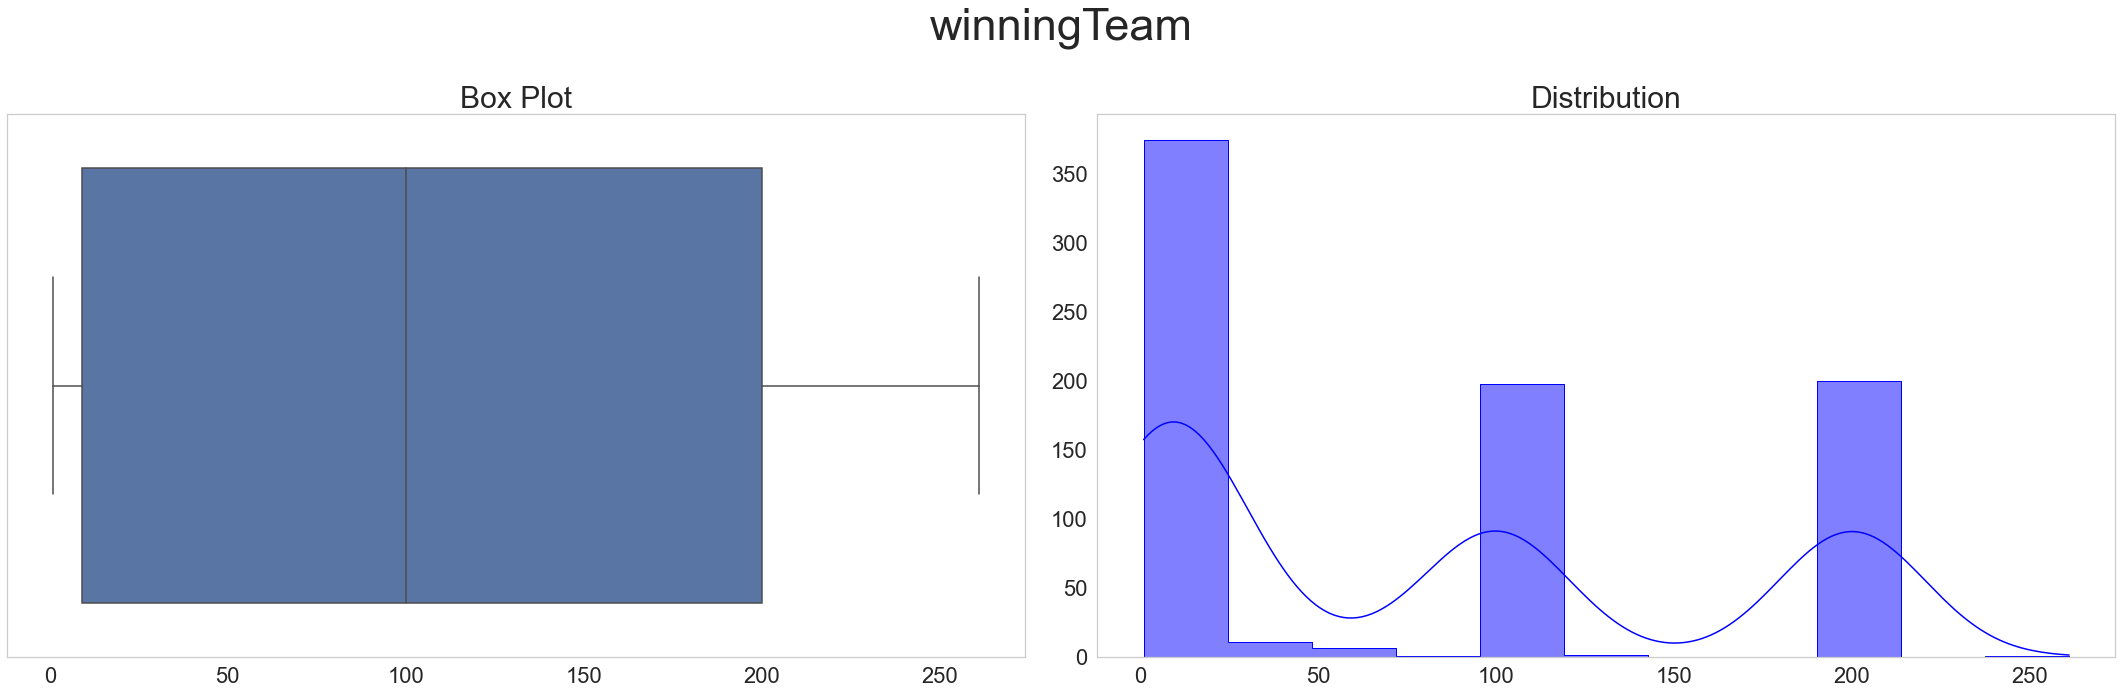

Summary Statistics for winningTeam
count    795.000000
mean      81.236478
std       78.687466
min        1.000000
25%        9.000000
50%      100.000000
75%      200.000000
max      261.000000
Name: winningTeam, dtype: float64


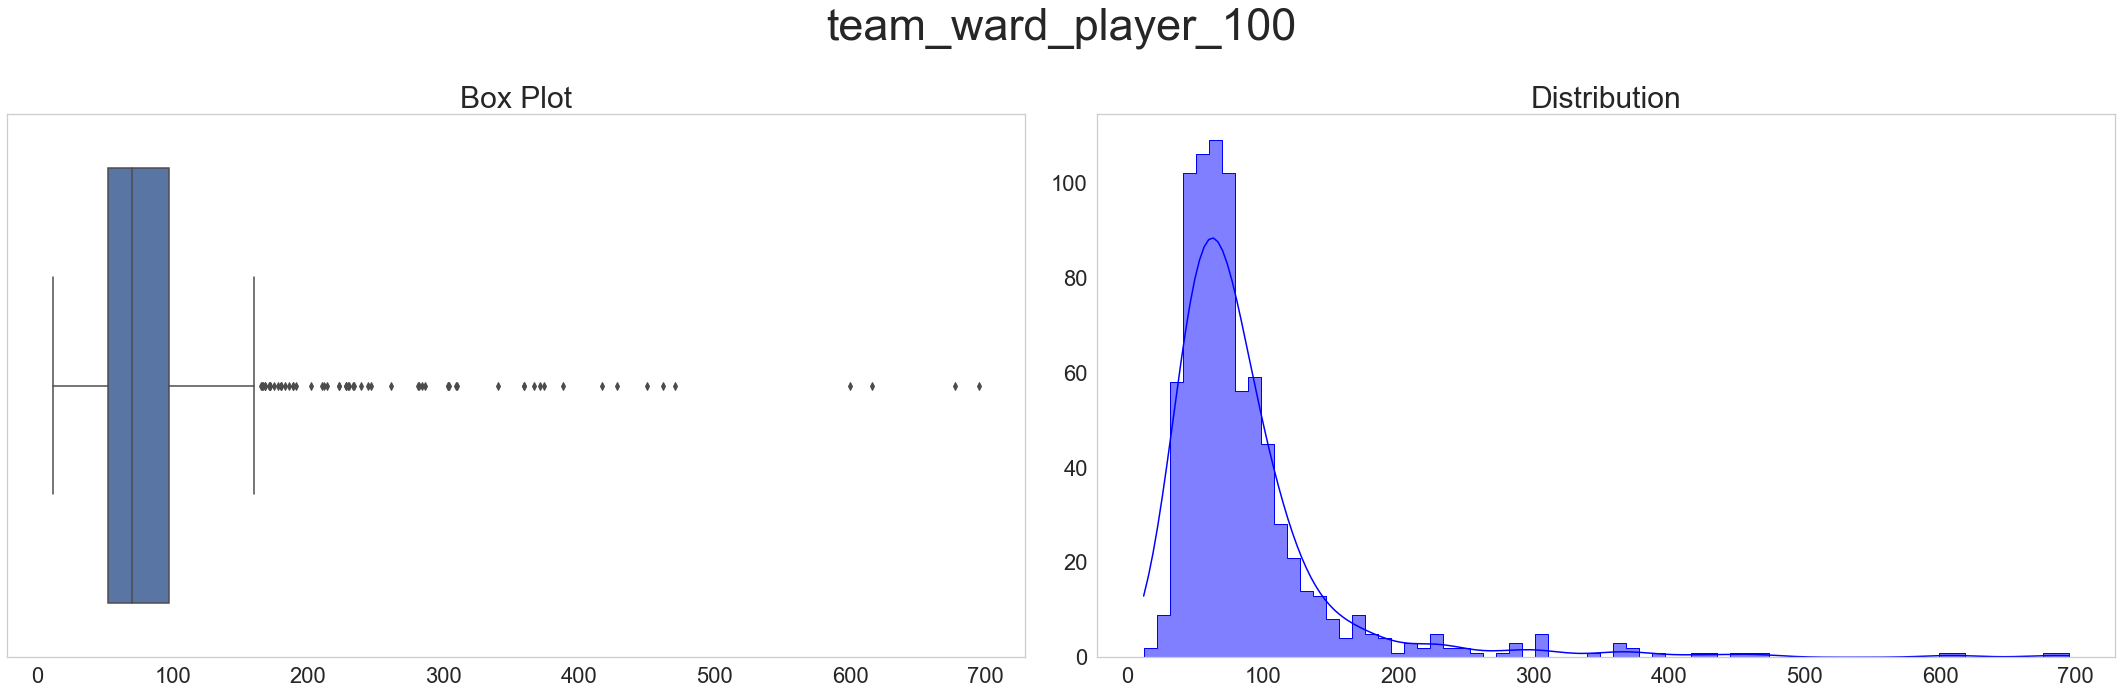

Summary Statistics for team_ward_player_100
count    795.000000
mean      88.802516
std       71.294384
min       12.000000
25%       52.000000
50%       70.000000
75%       97.000000
max      695.000000
Name: team_ward_player_100, dtype: float64


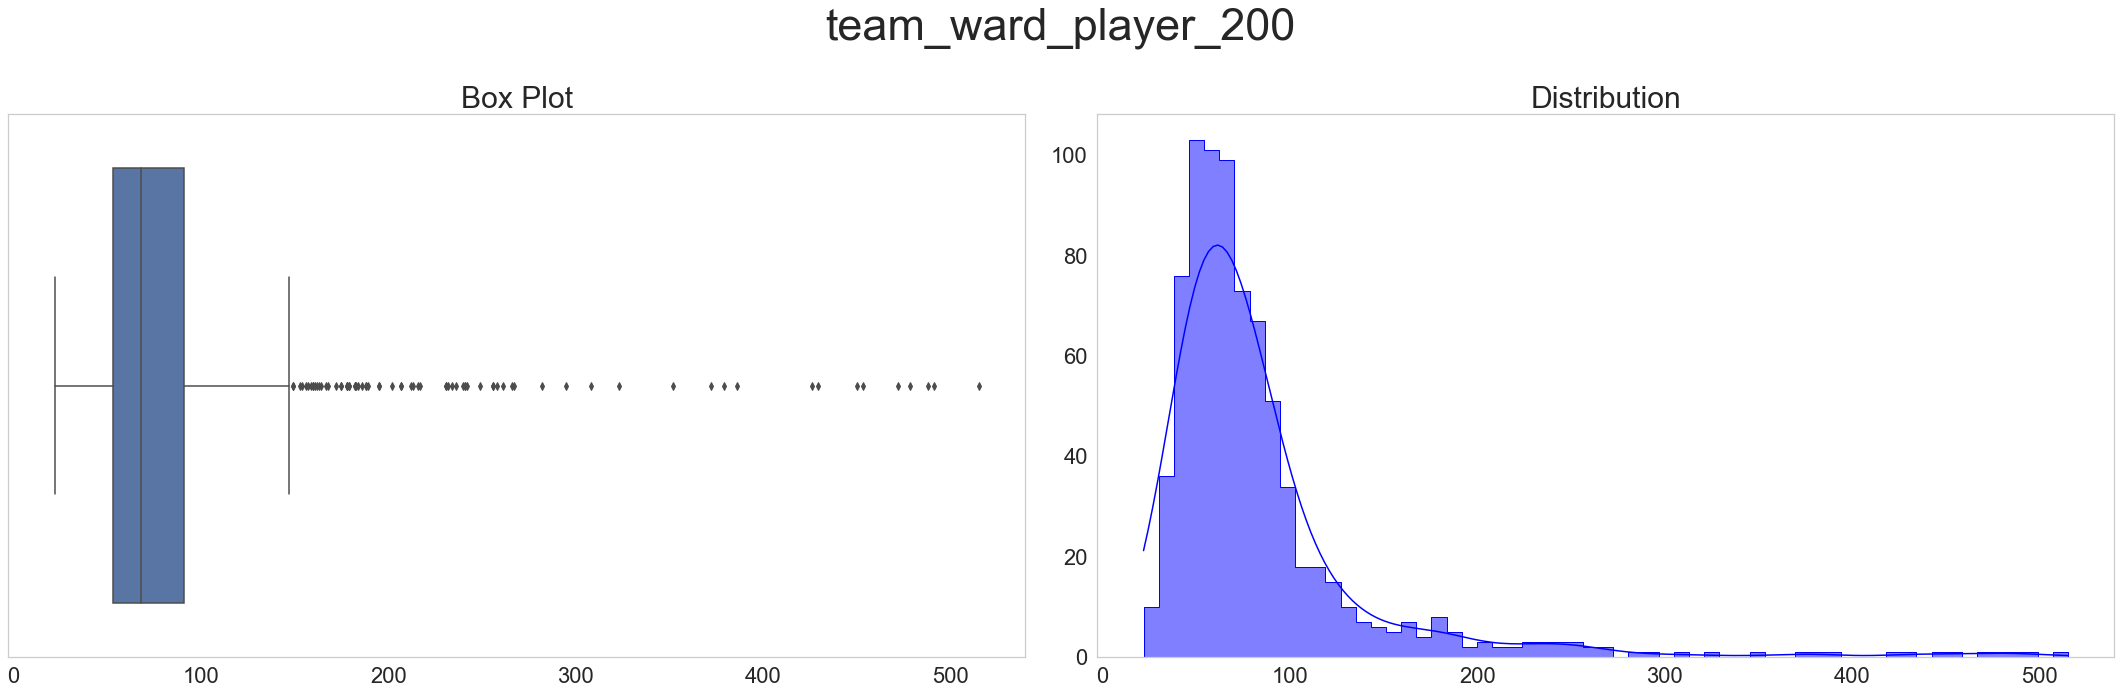

Summary Statistics for team_ward_player_200
count    795.000000
mean      85.577358
std       63.827400
min       22.000000
25%       53.000000
50%       68.000000
75%       91.000000
max      515.000000
Name: team_ward_player_200, dtype: float64


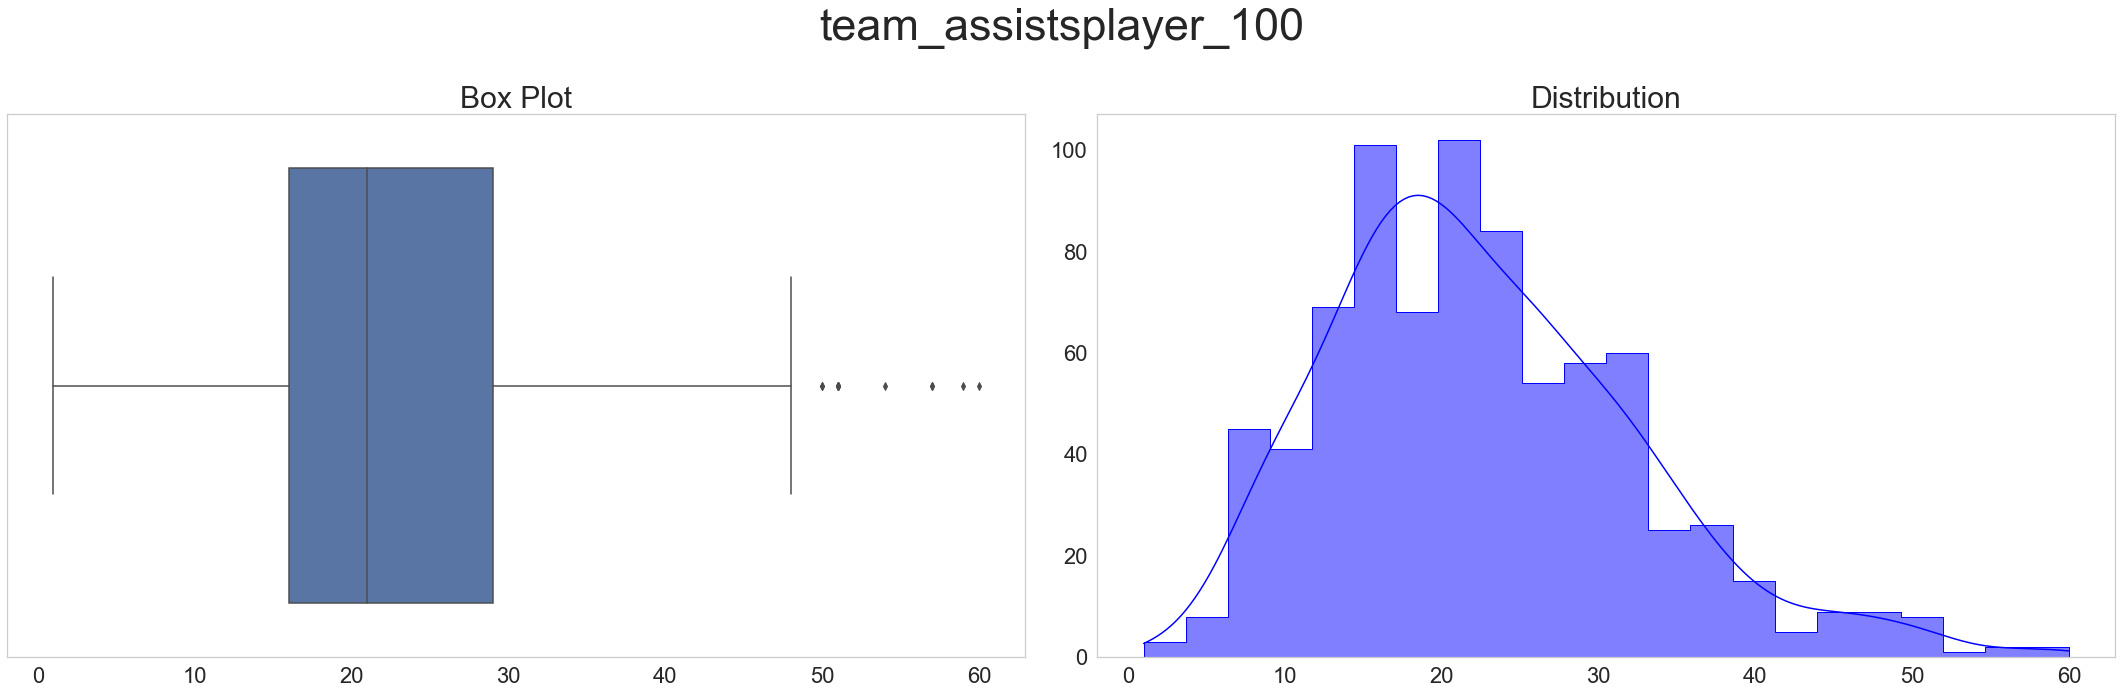

Summary Statistics for team_assistsplayer_100
count    795.000000
mean      22.628931
std        9.898320
min        1.000000
25%       16.000000
50%       21.000000
75%       29.000000
max       60.000000
Name: team_assistsplayer_100, dtype: float64


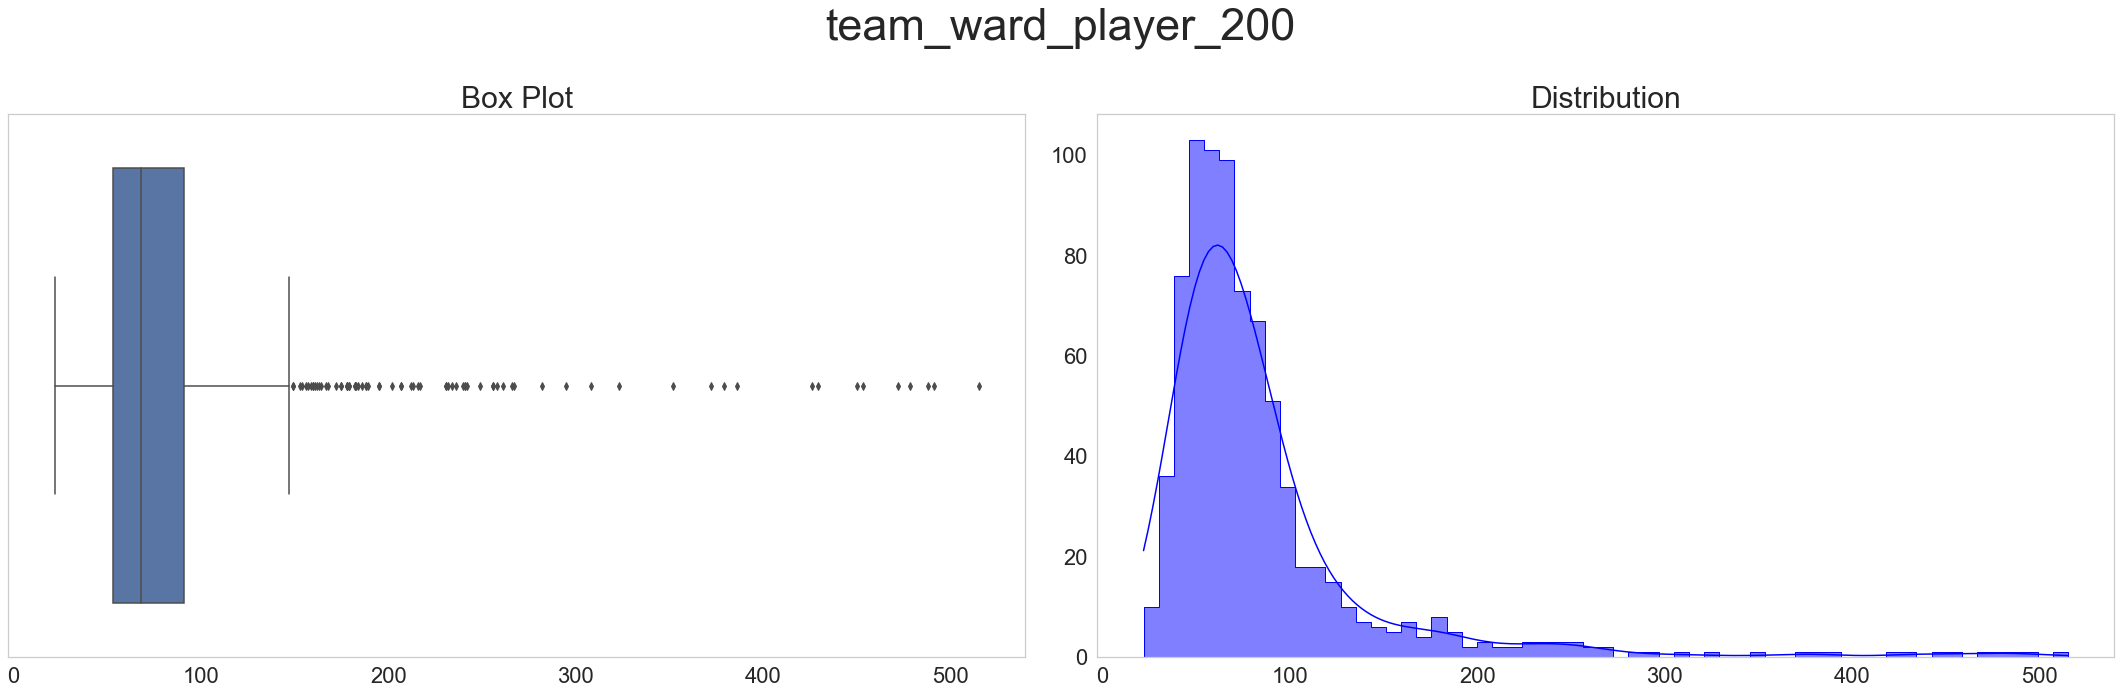

Summary Statistics for team_ward_player_200
count    795.000000
mean      85.577358
std       63.827400
min       22.000000
25%       53.000000
50%       68.000000
75%       91.000000
max      515.000000
Name: team_ward_player_200, dtype: float64


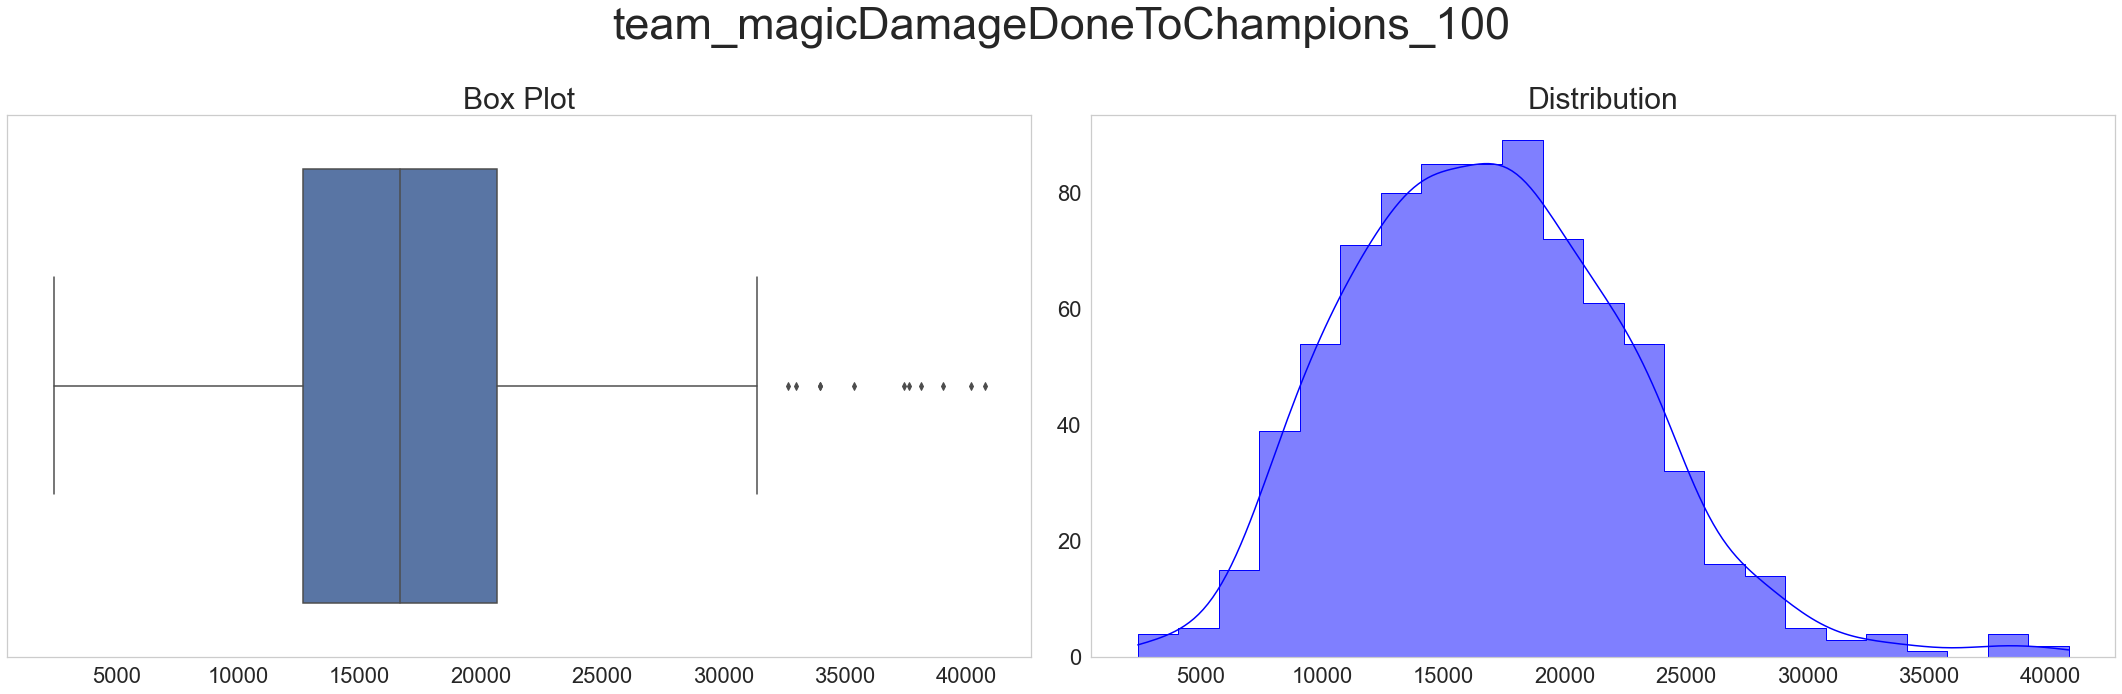

Summary Statistics for team_magicDamageDoneToChampions_100
count      795.000000
mean     16929.495597
std       5861.244384
min       2419.000000
25%      12688.500000
50%      16666.000000
75%      20665.000000
max      40761.000000
Name: team_magicDamageDoneToChampions_100, dtype: float64


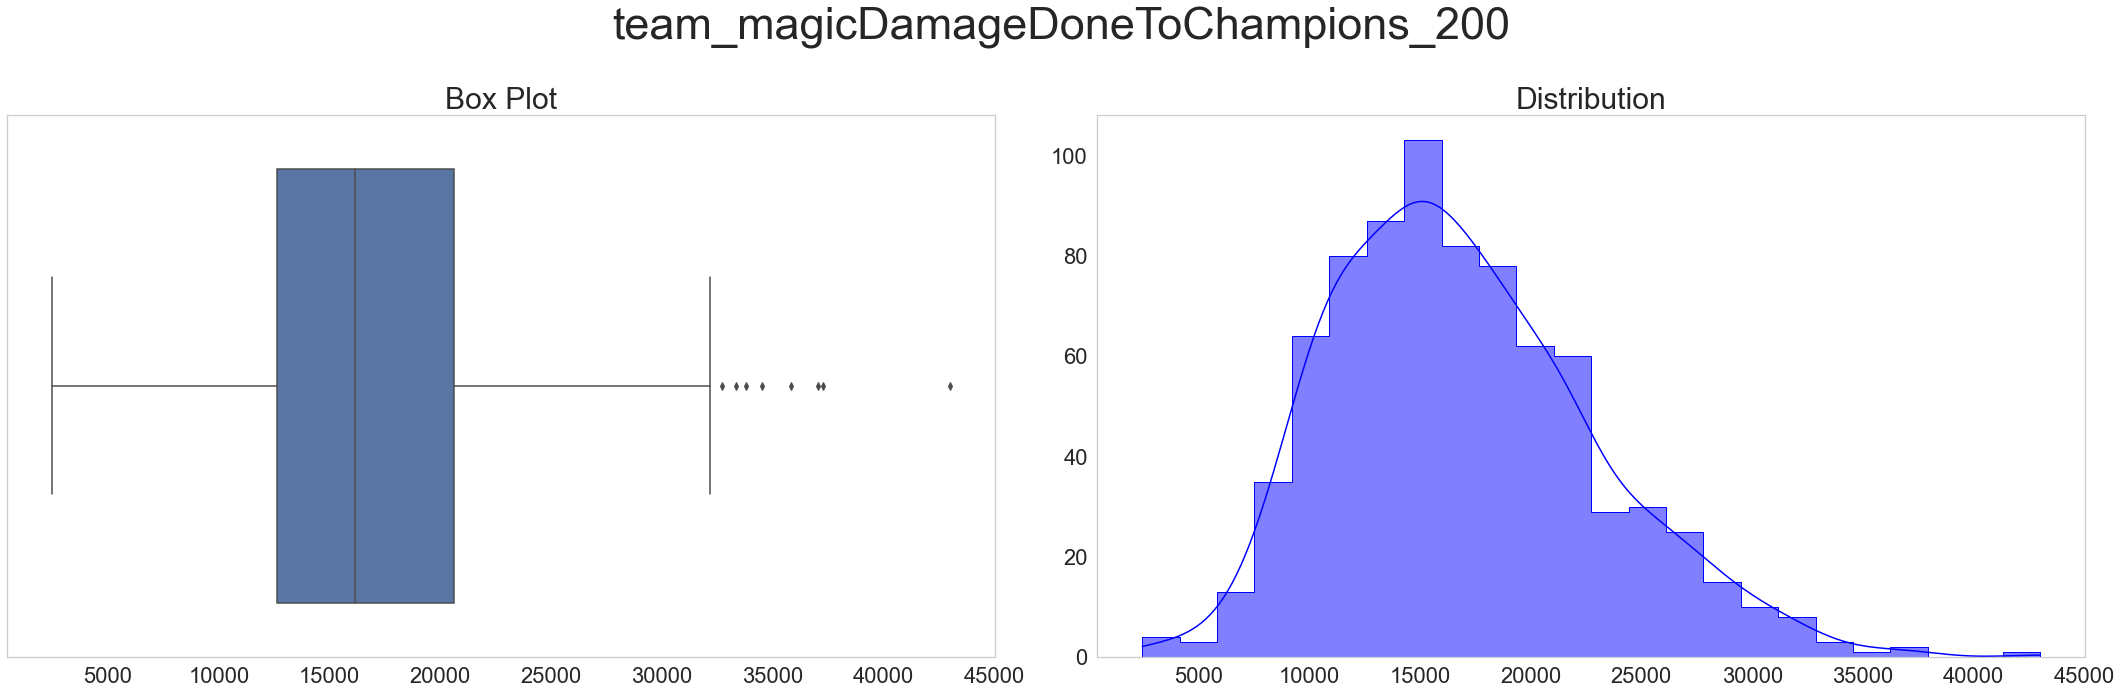

Summary Statistics for team_magicDamageDoneToChampions_200
count      795.000000
mean     16955.788679
std       5965.276274
min       2472.000000
25%      12619.000000
50%      16145.000000
75%      20613.000000
max      42992.000000
Name: team_magicDamageDoneToChampions_200, dtype: float64


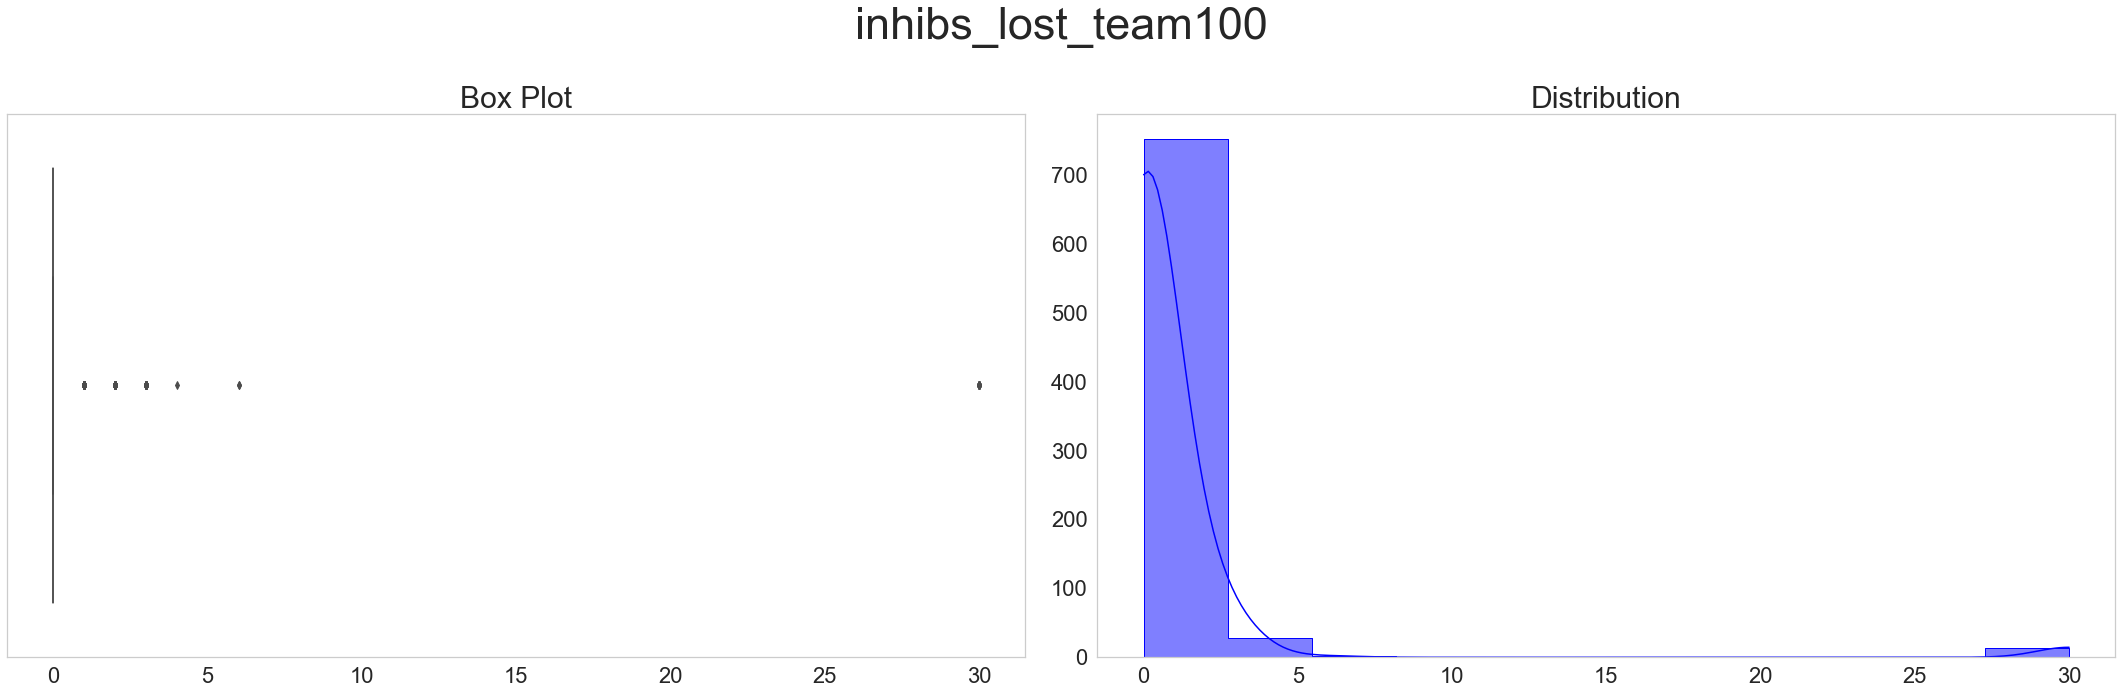

Summary Statistics for inhibs_lost_team100
count    795.000000
mean       0.899371
std        3.981688
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       30.000000
Name: inhibs_lost_team100, dtype: float64


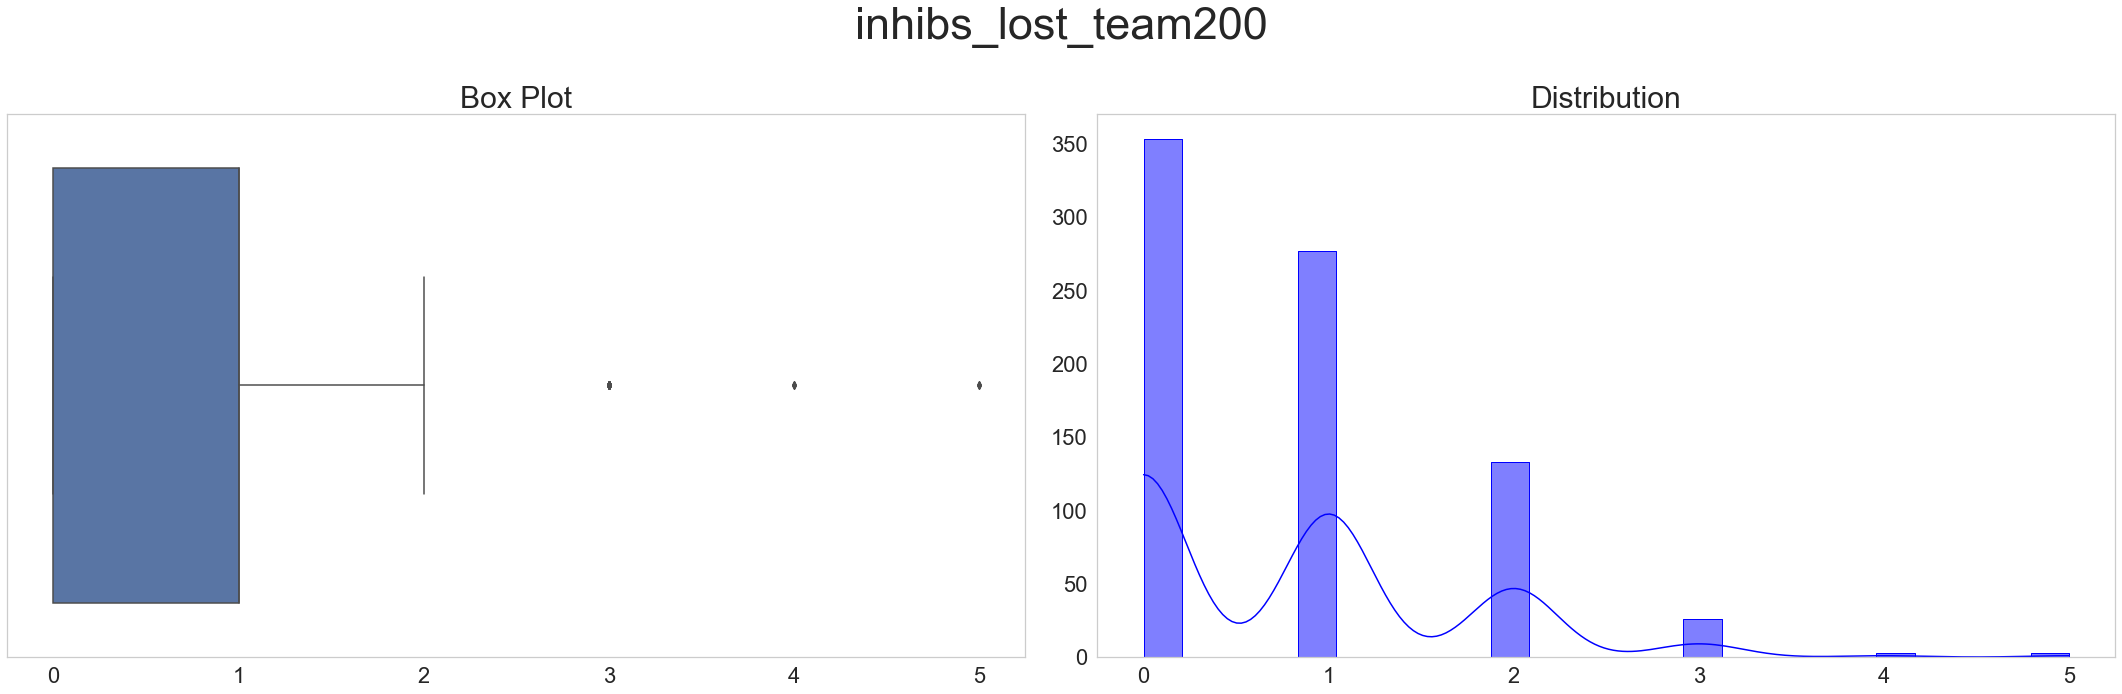

Summary Statistics for inhibs_lost_team200
count    795.000000
mean       0.815094
std        0.896269
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: inhibs_lost_team200, dtype: float64


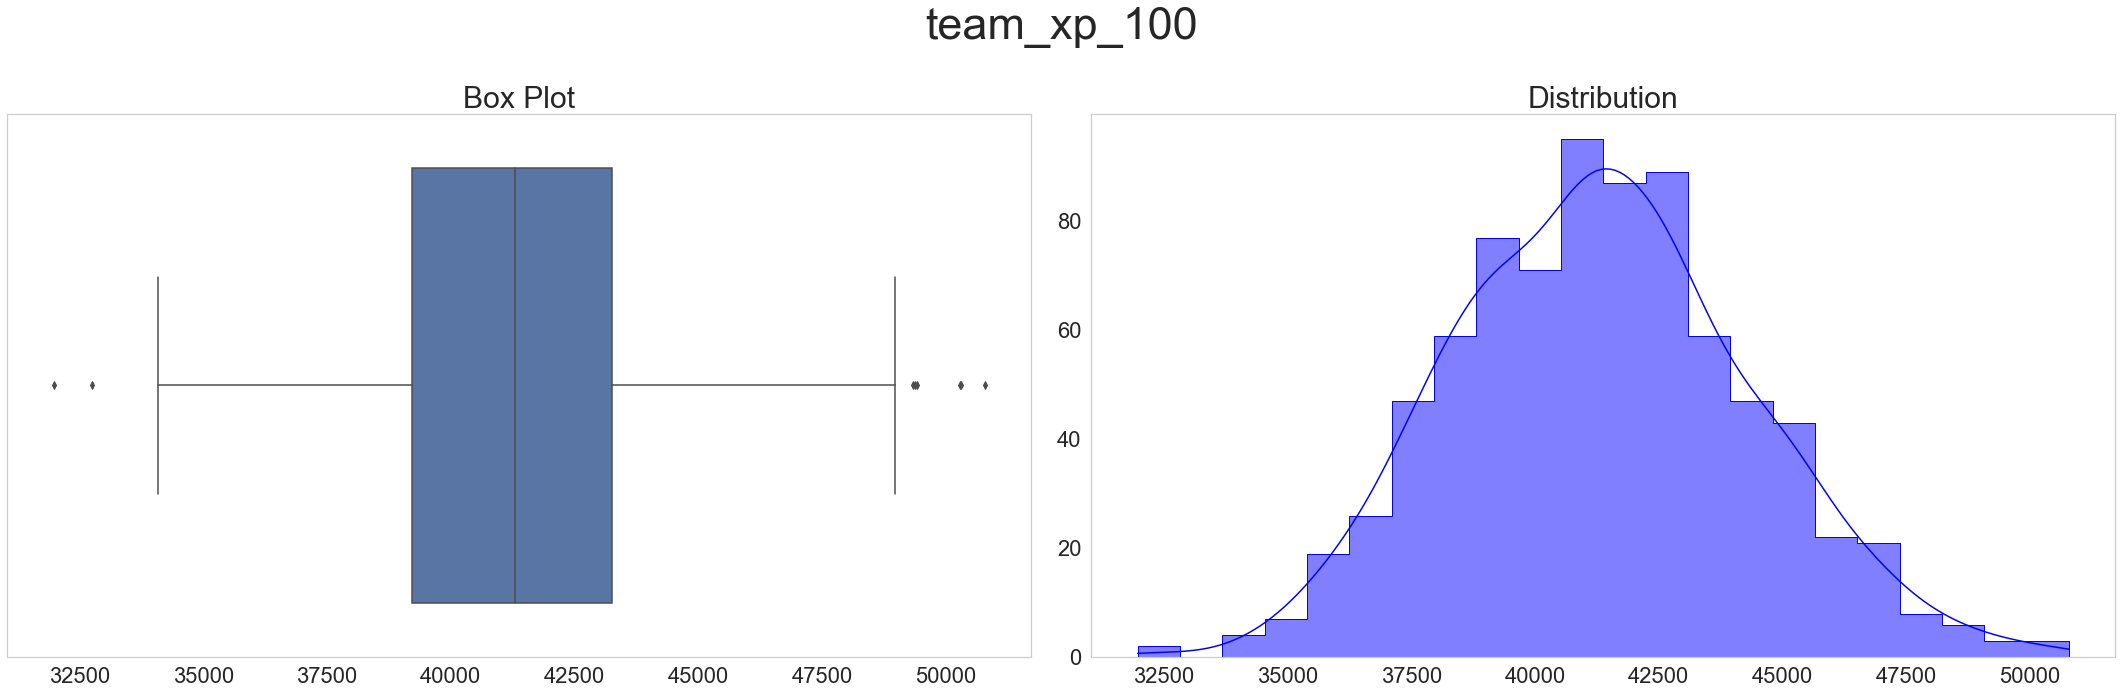

Summary Statistics for team_xp_100
count      795.000000
mean     41338.950943
std       3002.261717
min      31975.000000
25%      39212.000000
50%      41296.000000
75%      43249.000000
max      50790.000000
Name: team_xp_100, dtype: float64


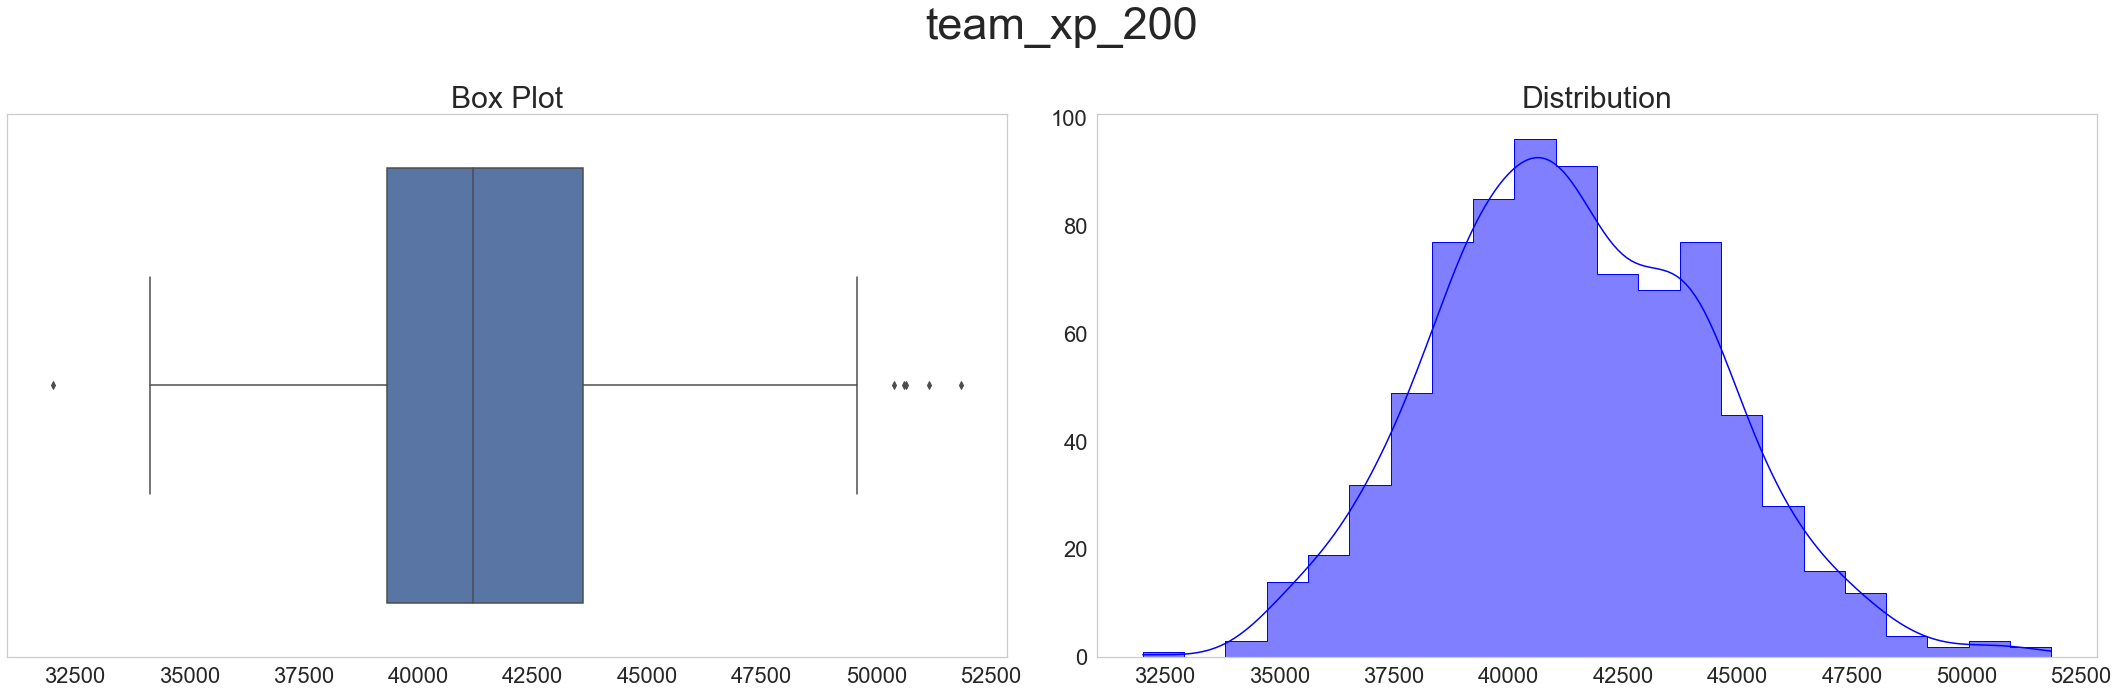

Summary Statistics for team_xp_200
count      795.000000
mean     41416.238994
std       3007.552234
min      32013.000000
25%      39309.000000
50%      41192.000000
75%      43594.000000
max      51852.000000
Name: team_xp_200, dtype: float64


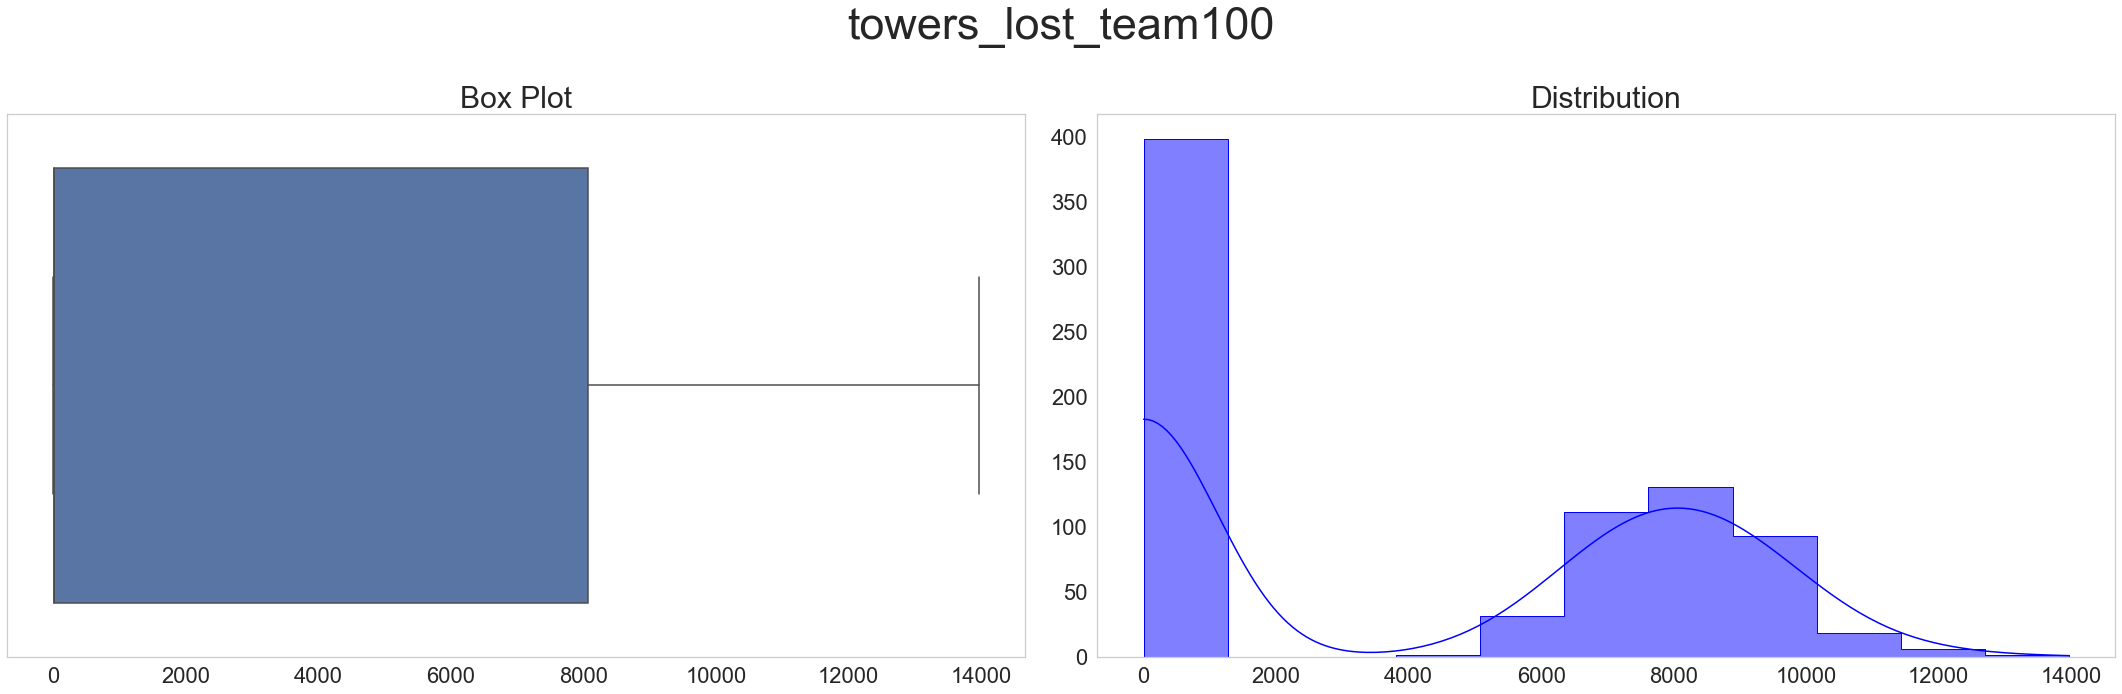

Summary Statistics for towers_lost_team100
count      795.000000
mean      4071.559748
std       4189.855956
min          0.000000
25%          5.000000
50%         11.000000
75%       8071.000000
max      13968.000000
Name: towers_lost_team100, dtype: float64


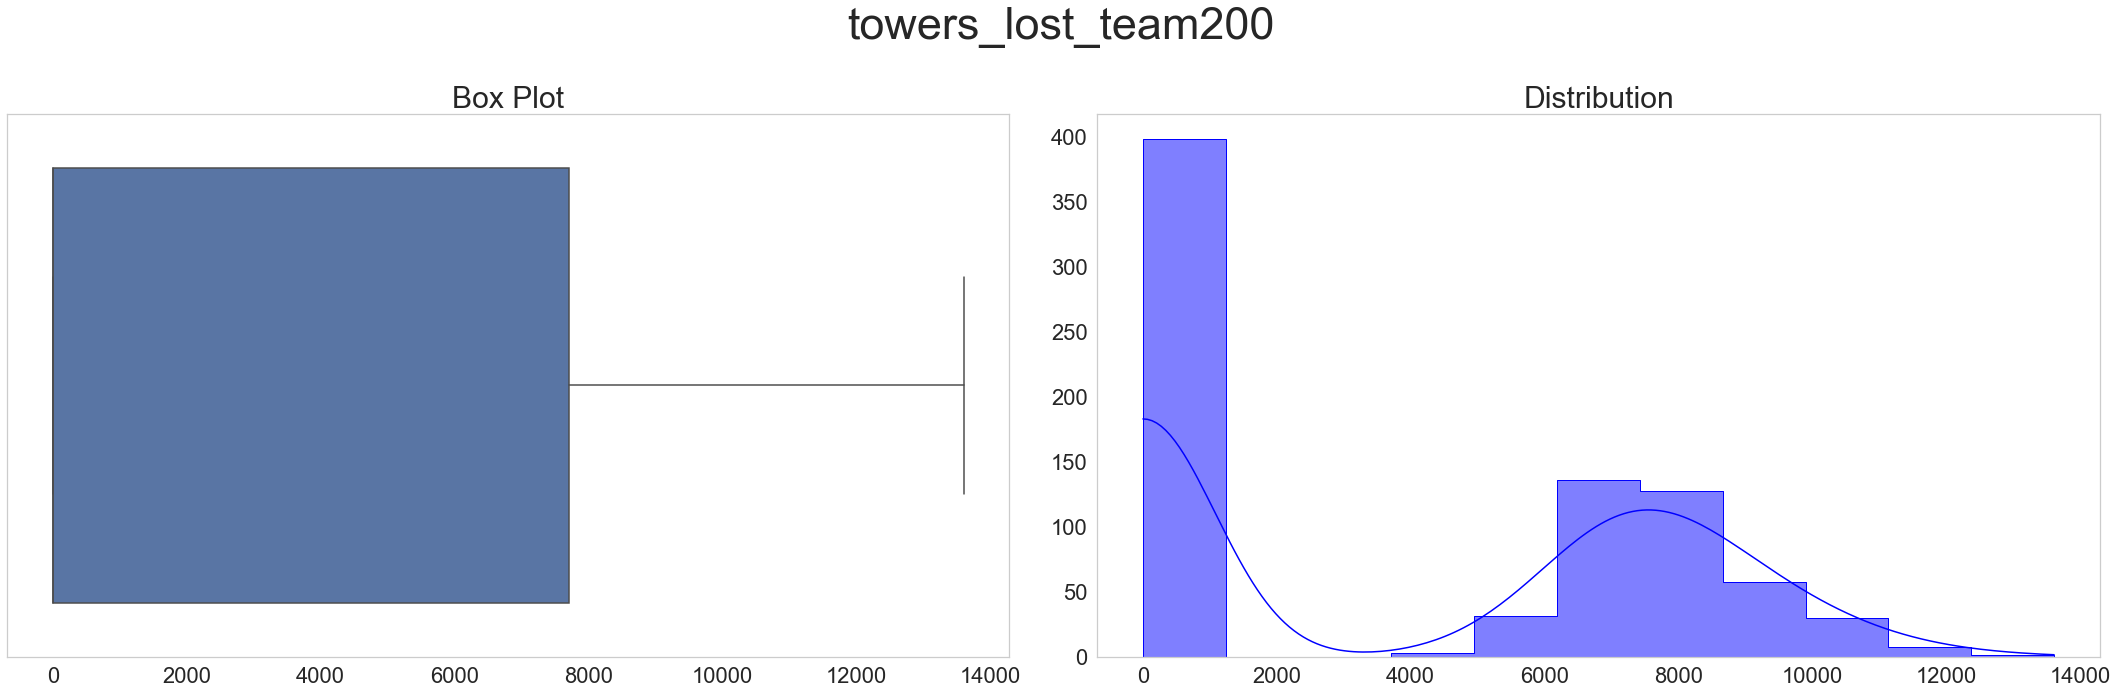

Summary Statistics for towers_lost_team200
count      795.000000
mean      3944.005031
std       4078.488589
min          0.000000
25%          5.000000
50%         11.000000
75%       7709.500000
max      13613.000000
Name: towers_lost_team200, dtype: float64


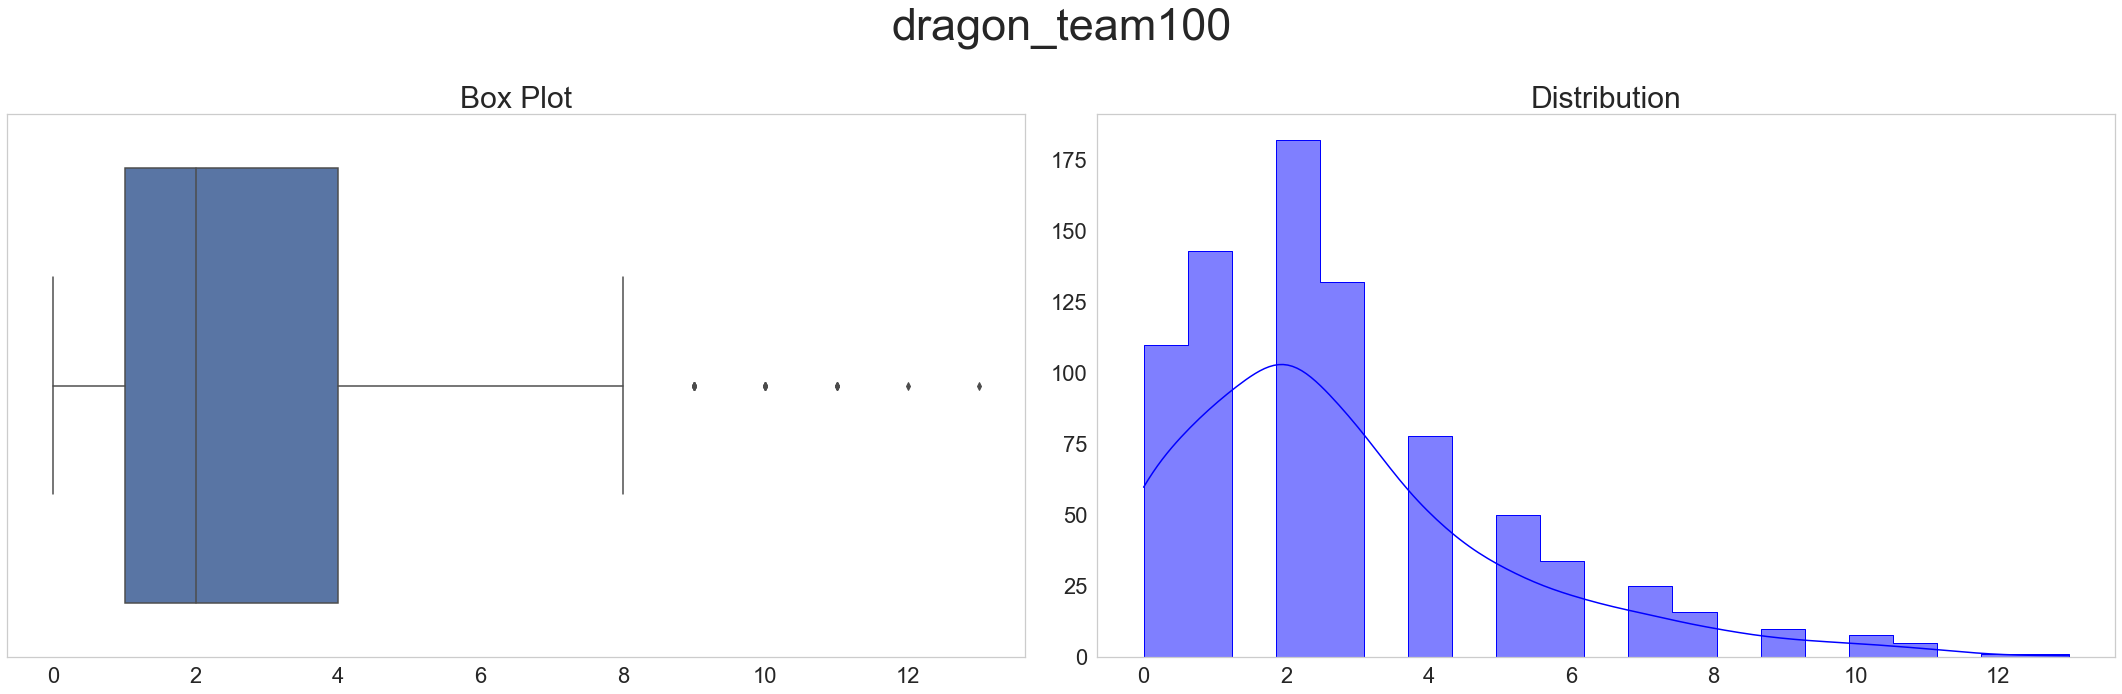

Summary Statistics for dragon_team100
count    795.000000
mean       2.794969
std        2.339987
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       13.000000
Name: dragon_team100, dtype: float64


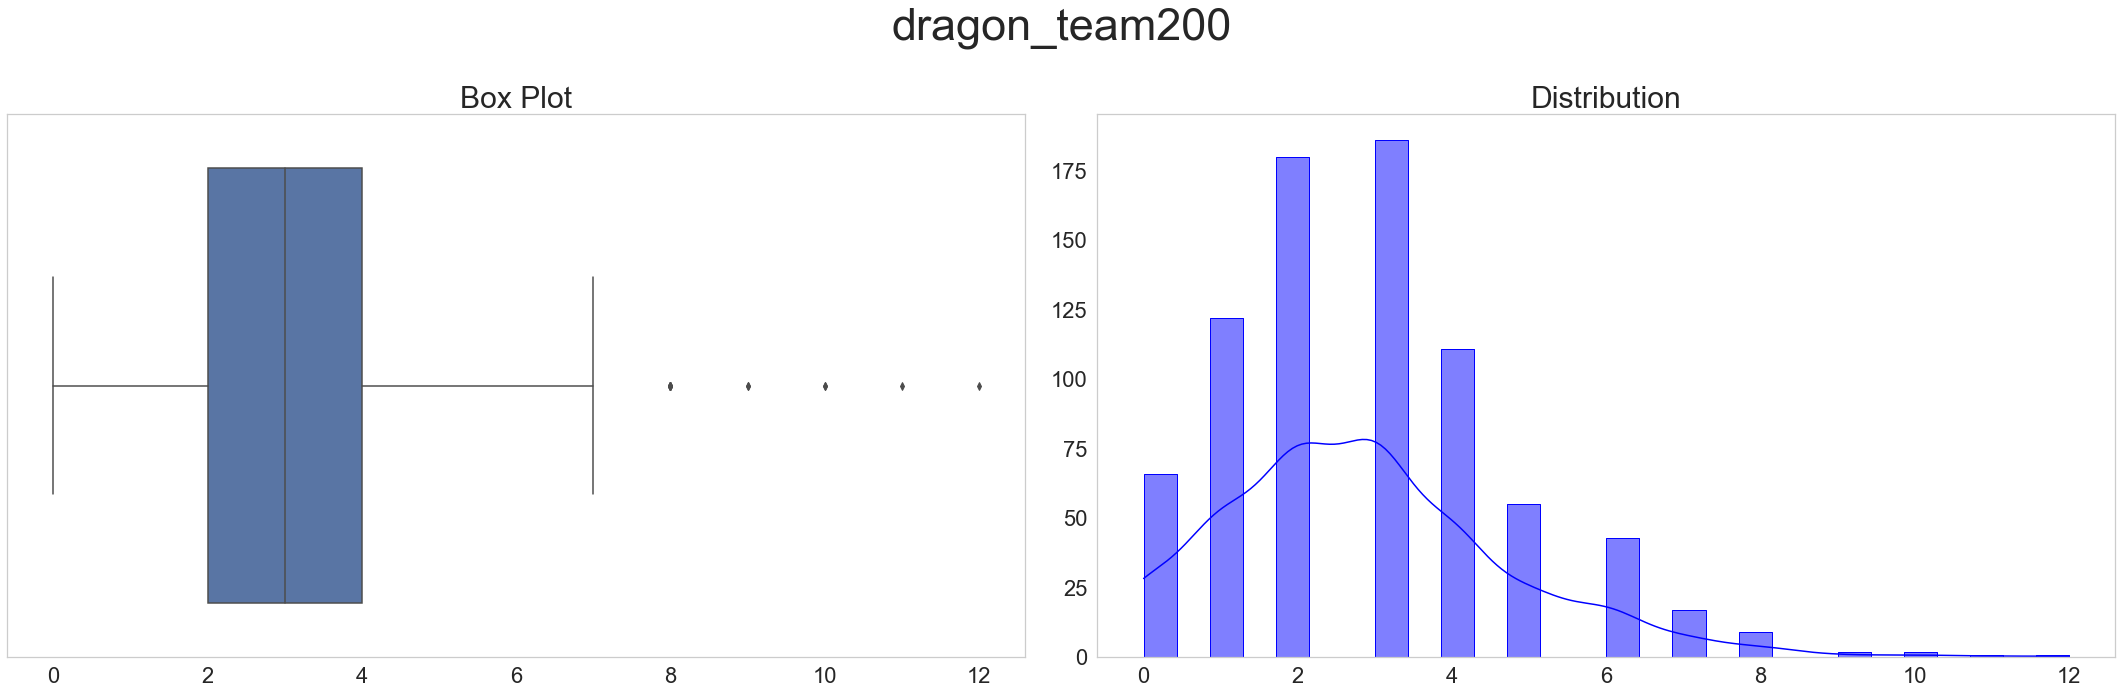

Summary Statistics for dragon_team200
count    795.000000
mean       2.854088
std        1.869507
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: dragon_team200, dtype: float64


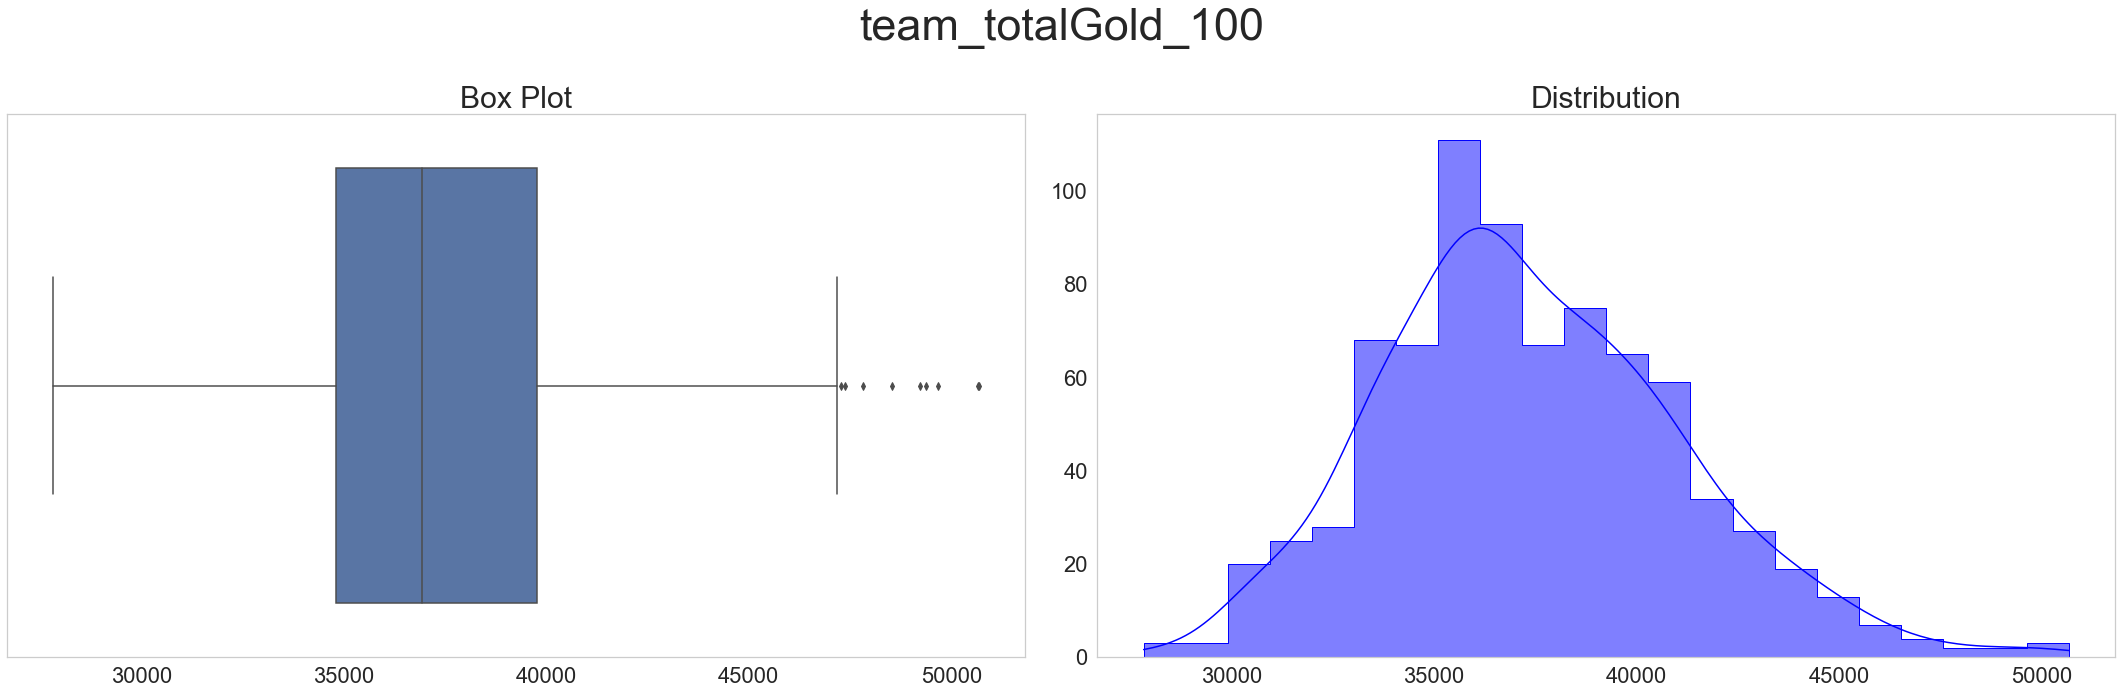

Summary Statistics for team_totalGold_100
count      795.000000
mean     37384.242767
std       3723.804279
min      27829.000000
25%      34806.500000
50%      36924.000000
75%      39756.500000
max      50681.000000
Name: team_totalGold_100, dtype: float64


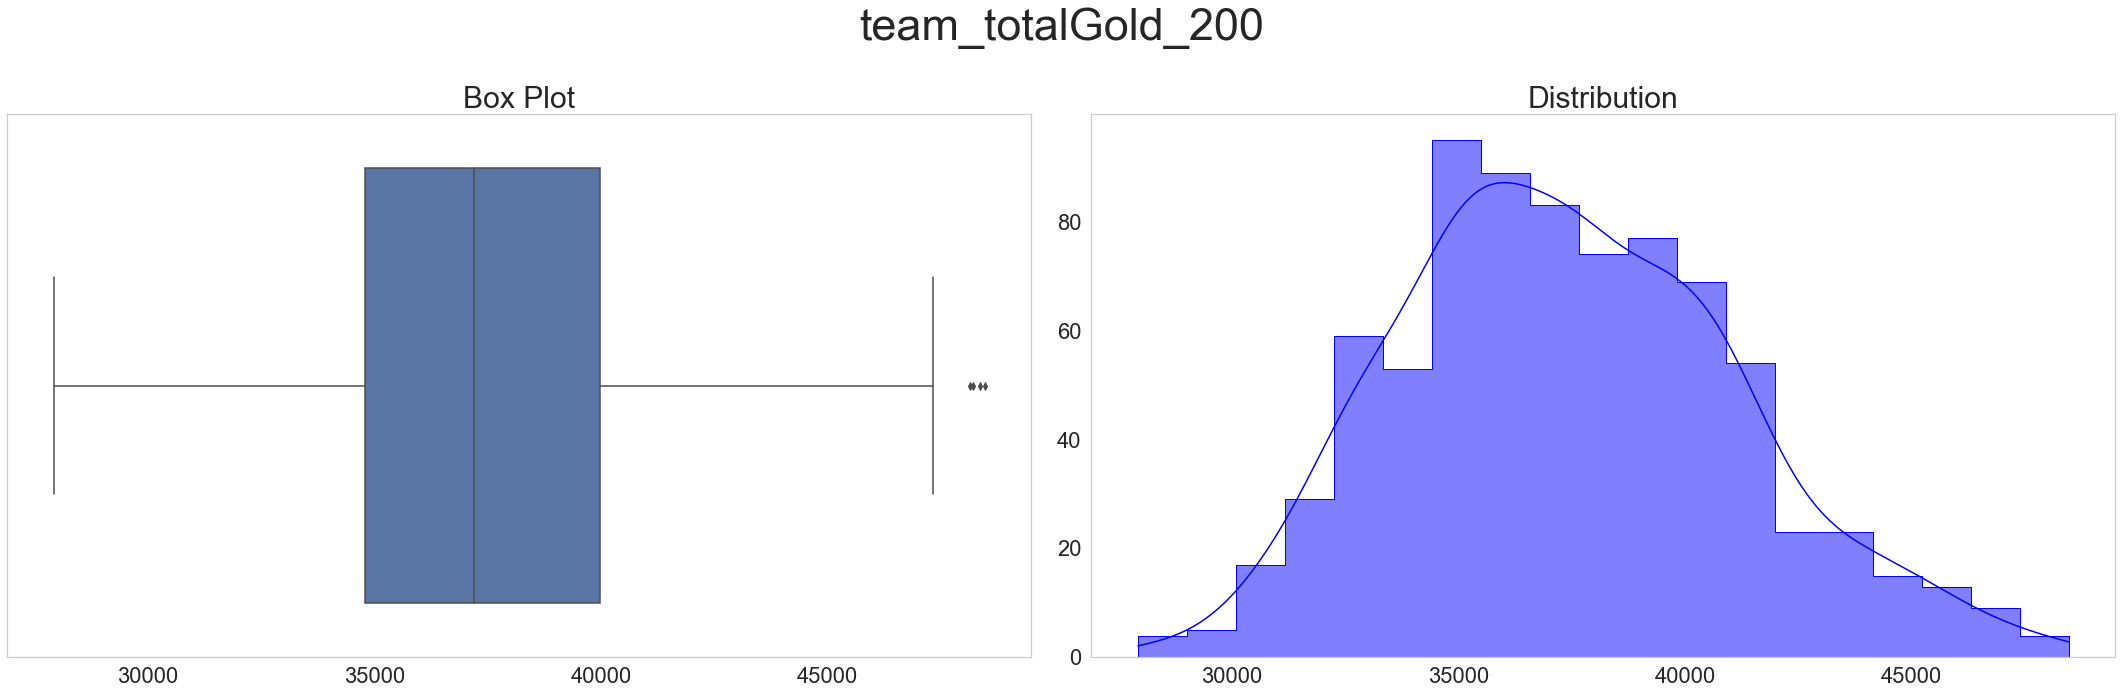

Summary Statistics for team_totalGold_200
count      795.000000
mean     37441.475472
std       3740.221576
min      27930.000000
25%      34792.000000
50%      37203.000000
75%      39985.500000
max      48463.000000
Name: team_totalGold_200, dtype: float64


In [81]:
# univariate study
univariate_study = ["winningTeam","team_ward_player_100","team_ward_player_200","team_assistsplayer_100","team_ward_player_200","team_magicDamageDoneToChampions_100","team_magicDamageDoneToChampions_200","inhibs_lost_team100","inhibs_lost_team200","team_xp_100","team_xp_200","towers_lost_team100","towers_lost_team200","dragon_team100","dragon_team200","team_totalGold_100","team_totalGold_200"]

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

<Figure size 864x576 with 0 Axes>

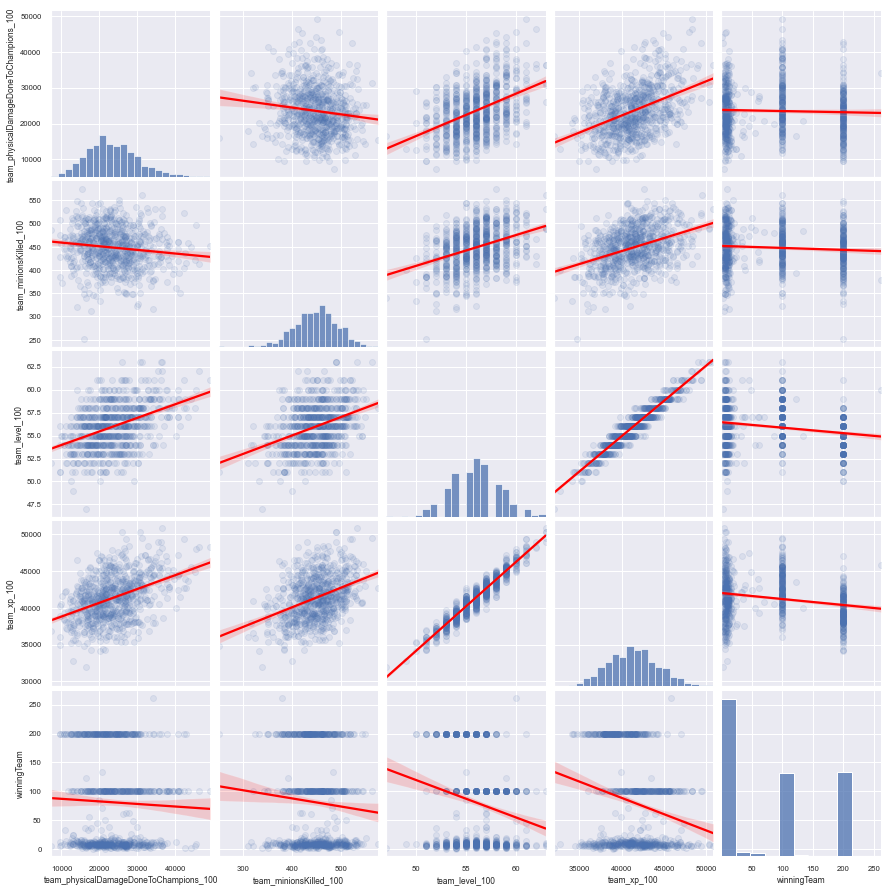

In [80]:
def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    sns.set(font_scale = .7)
    plt.show()
cols = ['team_physicalDamageDoneToChampions_100', 'team_minionsKilled_100','team_level_100', 'team_xp_100','winningTeam']
#pairplots 
sns.set(font_scale=.7)
plt.figure(figsize=(12,8))
plot_variable_pairs(train, cols)

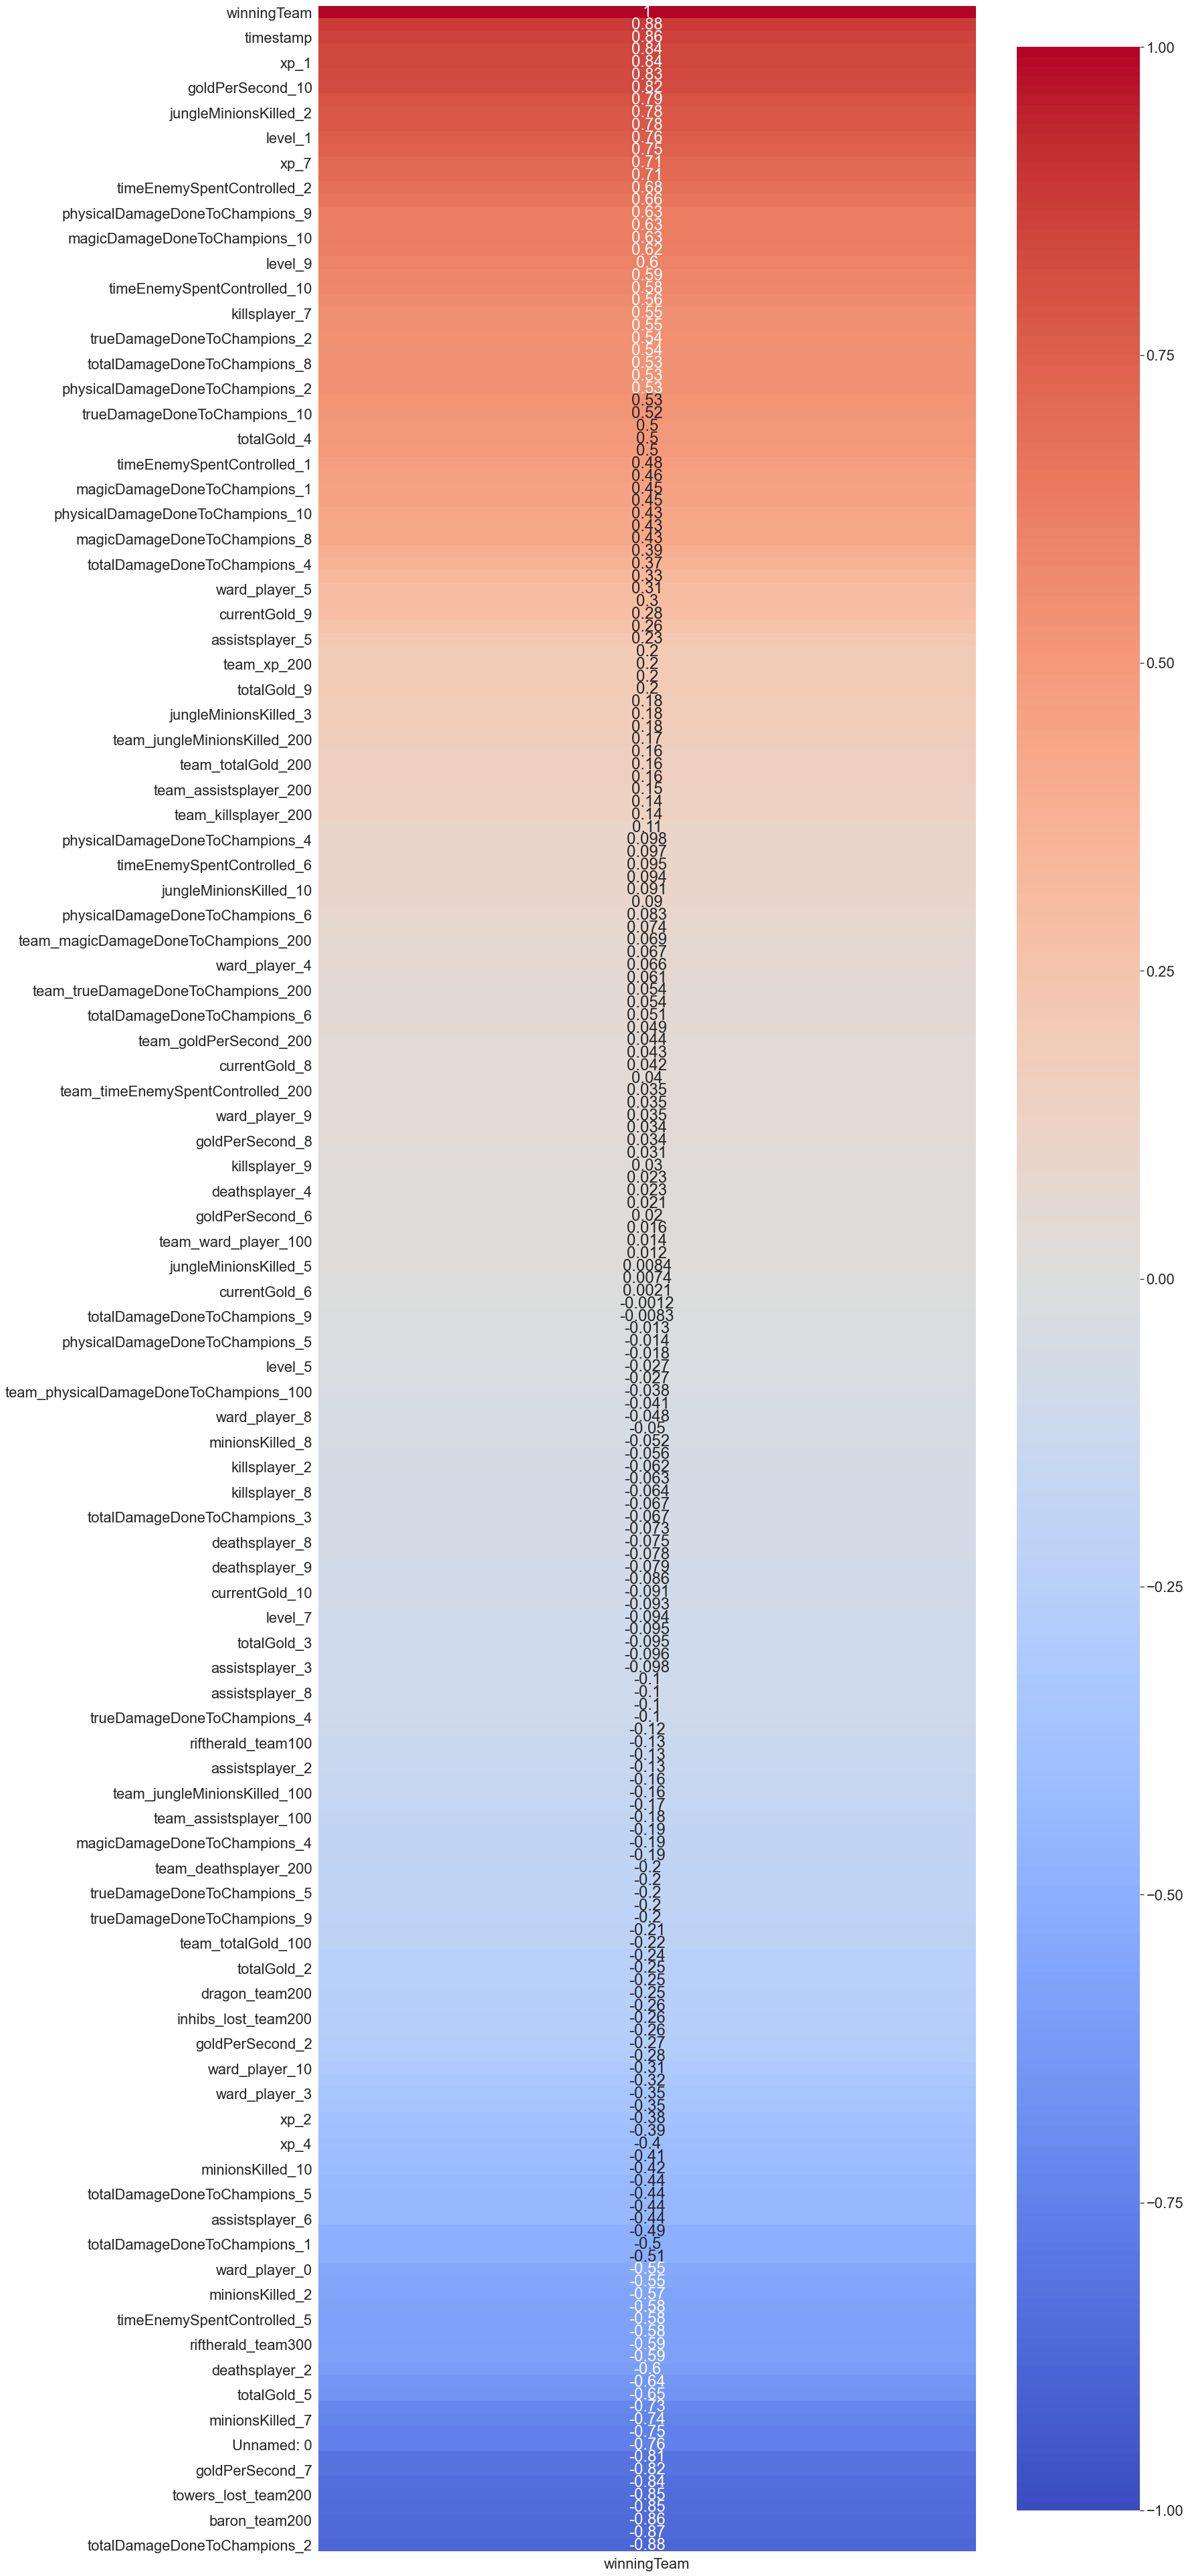

In [53]:
## Heatmap 
sns.set(font_scale=2)
plt.figure(figsize=(22,70))
heatmap = sns.heatmap(train.corr()[['winningTeam']].sort_values(by='winningTeam', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [60]:
cols = ["winningTeam","team_ward_player_100","team_ward_player_200","team_assistsplayer_100","team_ward_player_200","team_magicDamageDoneToChampions_100","team_magicDamageDoneToChampions_200","inhibs_lost_team100","inhibs_lost_team200","team_xp_100","team_xp_200","towers_lost_team100","towers_lost_team200","dragon_team100","dragon_team200","team_totalGold_100","team_totalGold_200"]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 0.03207272119438709. There is 0.032% chance that we see these results by chance.
r = 0.08


<Figure size 864x720 with 0 Axes>

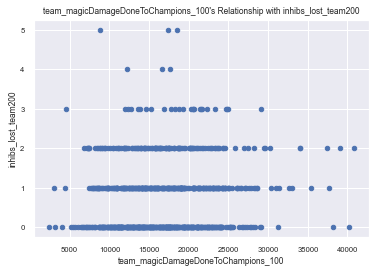

In [57]:
# correlation
sns.set(font_scale=.7)
plt.figure(figsize=(12,10))
correlation_exploration(train, 'team_magicDamageDoneToChampions_100', 'inhibs_lost_team200')
# Looks like magice damage done by blue team to champions decreases after 2 inhibitor lost by red team

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


The p-value is: 7.616228209643686e-10. There is 0.0% chance that we see these results by chance.
r = -0.22


<Figure size 864x720 with 0 Axes>

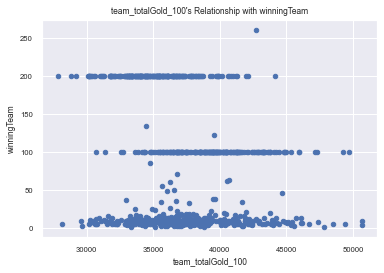

In [64]:
plt.figure(figsize=(12,10))
correlation_exploration(train, 'team_totalGold_100', 'winningTeam')
# high correlation between total gold for blue team and the outcome

# Bivariate 

Damage by blue and outcome


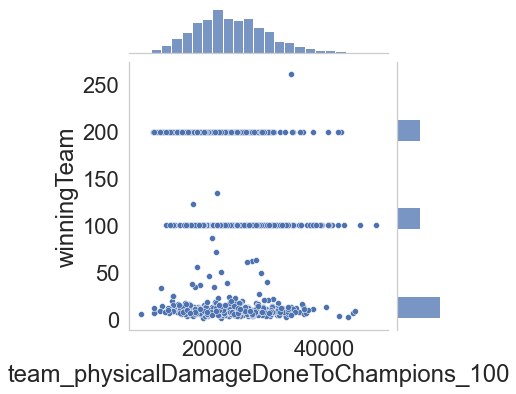

In [68]:
#winningTeam across physical damage to champions for blue team
print('Damage by blue and outcome')
sns.jointplot(x='team_physicalDamageDoneToChampions_100', y='winningTeam', data=train)
plt.xlabel('Damage')
plt.ylabel('Winning Team')
plt.show()


In [70]:
# hypothesis testing

null_hypothesis = "team_physicalDamageDoneToChampions_100 > 20,000 has no difference in the outcome of the game"
alternative_hypothesis = "team_physicalDamageDoneToChampions_100 < 20,000 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_damage = train[train.team_physicalDamageDoneToChampions_100 > 20_000]
little_damage = train[train.team_physicalDamageDoneToChampions_100 <= 20_000]
t, p = stats.ttest_ind(big_damage.winningTeam, little_damage.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

0.4495093534741159
Fail to reject null hypothesis that: team_physicalDamageDoneToChampions_100 > 20,000 has no difference in the outcome of the game There is not sufficient evidence to reject it.


- Team damage over 20k does not effect the outcome of the game

Team level blue and outcome


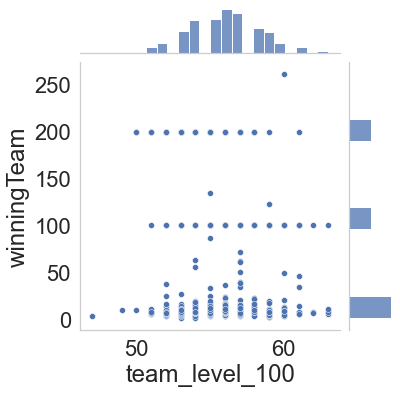

In [71]:
#winningTeam across team level for blue team
print('Team level blue and outcome')
sns.jointplot(x='team_level_100', y='winningTeam', data=train)
plt.xlabel('Team Level')
plt.ylabel('Winning Team')
plt.show()


In [74]:
# hypothesis testing

null_hypothesis = "team_level_100 < 55 has no difference in the outcome of the game"
alternative_hypothesis = "team_level_100 > 55 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_level = train[train.team_level_100 > 55]
little_level = train[train.team_level_100 <= 55]
t, p = stats.ttest_ind(big_level.winningTeam, little_level.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

5.8704566251352814e-08
Reject null hypothesis that: team_level_100 < 55 has no difference in the outcome of the game
There is evidence to suggest: team_level_100 > 55 has a difference in the outcome of the game


- A team who has an average level of 55 and over has significant effect on the game